### SCIPY Rotation CONVERSION Exmaple

In [3]:
from scipy.spatial.transform import Rotation as R
import numpy as np

# rotation object can be defined from vec, quat, matrix
r = R.from_rotvec(np.pi/2 * np.array([0, 0, 1]))
r = R.from_quat([0, 0, np.sin(np.pi/4), np.cos(np.pi/4)])
r = R.from_matrix([[0, -1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

# rotation object can be converted to vec, quat, matrix
r.as_rotvec()
r.as_quat()
r.as_euler('zyx', degrees=True)

# possible to invert rotation
r1 = R.from_euler('z', [90, 45], degrees=True)
r2 = r1.inv()
r2.as_euler('zyx', degrees=True)


array([[-90.,   0.,  -0.],
       [-45.,   0.,  -0.]])

### Rotation Plot Example

In [1]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import numpy as np


def plot_rotated_axes(ax, r, name=None, offset=(0, 0, 0), scale=1):
    colors = ("#FF6666", "#005533", "#1199EE")  # Colorblind-safe RGB
    origins = np.array([offset, offset])
    
    for i, (axis, c) in enumerate(zip((ax.xaxis, ax.yaxis, ax.zaxis), colors)):
        axlabel = axis.axis_name
        axis.set_label_text(axlabel)
        axis.label.set_color(c)
        axis.line.set_color(c)
        axis.set_tick_params(colors=c)
        
        axisline = np.zeros((2, 3))
        axisline[1, i] = 1
        axisline_rot = r.apply(axisline) #rot is applied only on 2nd row element
        axisline_startend = axisline_rot + origins[0] #[[],[]]
        
        ax.plot(axisline_startend[:, 0], axisline_startend[:, 1], axisline_startend[:, 2], c)
        text_loc = axisline[1]*1.2
        text_loc_rot = r.apply(text_loc)
        text_plot = text_loc_rot + origins[0]
        
        ax.text(*text_plot, axlabel.upper(), color=c,
                va="center", ha="center")
    ax.text(*offset, name, color="k", va="center", ha="center",
            bbox={"fc": "w", "alpha": 0.8, "boxstyle": "circle"})

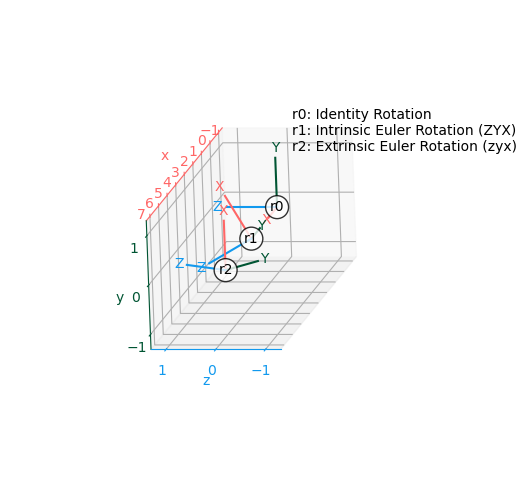

In [2]:
r0 = R.identity()
r1 = R.from_euler("ZYX", [90, -30, 0], degrees=True)  # intrinsic
r2 = R.from_euler("zyx", [90, -30, 0], degrees=True)  # extrinsic

ax = plt.figure().add_subplot(projection="3d", proj_type="ortho")
plot_rotated_axes(ax, r0, name="r0", offset=(0, 0, 0))
plot_rotated_axes(ax, r1, name="r1", offset=(3, 0, 0))
plot_rotated_axes(ax, r2, name="r2", offset=(6, 0, 0))
_ = ax.annotate(
    "r0: Identity Rotation\n"
    "r1: Intrinsic Euler Rotation (ZYX)\n"
    "r2: Extrinsic Euler Rotation (zyx)",
    xy=(0.6, 0.7), xycoords="axes fraction", ha="left"
)
ax.view_init(elev=-10, azim=12, roll=90)
ax.set(xlim=(-1.25, 7.25), ylim=(-1.25, 1.25), zlim=(-1.25, 1.25))
ax.set(xticks=range(-1, 8), yticks=[-1, 0, 1], zticks=[-1, 0, 1])
ax.set_aspect("equal", adjustable="box")
ax.figure.set_size_inches(6, 5)
plt.tight_layout()
plt.show()